In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A Simple Spam Classifier Using SVM
##Package version:
######numpy = 1.2.2
######pandas = 1.5.3
######sklearn = 3.7.1
######matplotlib = 1.2.2

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')

In [3]:
df.isna().sum() # all missing value

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
d_abc = df['label'].value_counts() #number of each class
d_per = df['label'].value_counts() * 100/ (len(df)) #to percentage
print(d_abc)
print(d_per)

ham     4825
spam     747
Name: label, dtype: int64
ham     86.593683
spam    13.406317
Name: label, dtype: float64


In [5]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam'] #Name assignment
ham.shape, spam.shape

((4825, 4), (747, 4))

In [6]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape #balancing

((747, 4), (747, 4))

In [7]:
data = pd.concat([spam , ham])
data.shape

(1494, 4)

In [8]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

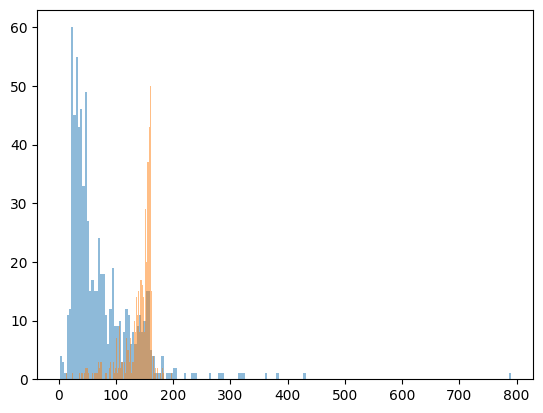

In [9]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 200, alpha = 0.5)
plt.hist(data[data['label'] == 'spam']['length'], bins = 200, alpha = 0.5) # creating histogram which indicating the importance of length
plt.show()

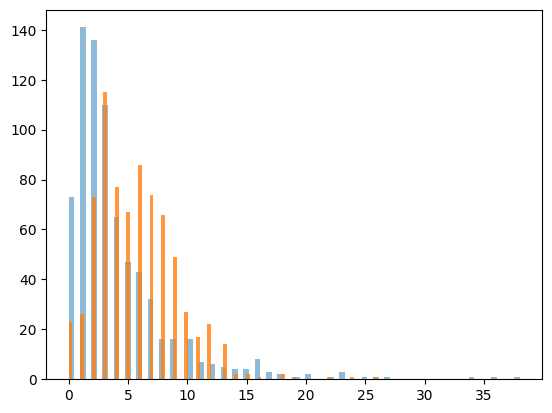

In [10]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 80, alpha = 0.5)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 80, alpha = 0.8) #not a good measure
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True) # x the input and y output value of train

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1045,) (449,) (1045,) (449,)


#SVM

In [14]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto' ,kernel="linear"))]) #setting up svm

In [16]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto', kernel='linear'))])

In [17]:
y_pred = svm.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9643652561247216
[[217   5]
 [ 11 216]]
              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       222
        spam       0.98      0.95      0.96       227

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [20]:
test1 = ['Hello, You are in Github']
test2 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test3 = ['Hello, You are in Github and you won a ticket worth 1  do call us this is not-spam ']

In [21]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['spam']
['spam']
